In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Reading the three CSV files**

In [5]:
regression_1 = pd.read_csv("regression_1.csv")
regression_2 = pd.read_csv("regression_2.csv")
classification_1 = pd.read_csv("classification.csv")

**printing first 10 rows of each file**

In [6]:
print(regression_1.head(10))
print(regression_2.head(10))
print(classification_1.head(10))

    x1        x2
0  0.0 -0.674904
1  0.1 -0.479806
2  0.2 -0.806082
3  0.3  0.053077
4  0.4 -0.393342
5  0.5  0.017427
6  0.6  0.221410
7  0.7  0.350120
8  0.8 -0.048362
9  0.9  0.176704
     x1        x2
0 -10.0  0.070295
1  -9.0 -0.045762
2  -8.0  0.044281
3  -7.0 -0.012570
4  -6.0  0.208319
5  -5.0 -0.070227
6  -4.0  0.044290
7  -3.0 -0.005975
8  -2.0 -0.081131
9  -1.0  0.109323
          x1        x2  label
0 -10.097950 -3.230260      1
1  -2.255579  5.107107      0
2 -10.562037 -3.919005      1
3  -0.126070  3.079037      0
4  -9.249422 -4.100176      1
5  -0.326299  5.184230      0
6  -1.226970  4.277566      0
7 -10.095259 -4.463325      1
8  -1.442369  2.940516      0
9  -9.699568 -3.918992      1


**plot for Regression_1**

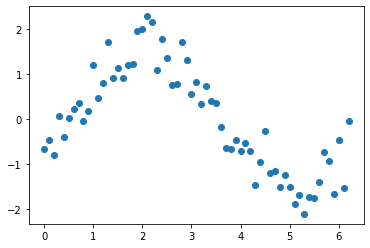

In [7]:
plt.scatter(regression_1.x1,regression_1.x2)
plt.show()

**plot for Regression_2 data set**


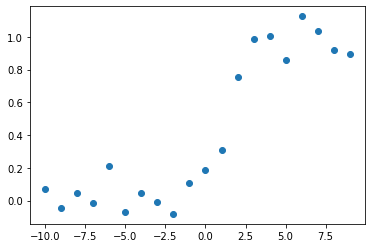

In [15]:
plt.scatter(regression_2.x1,regression_2.x2)
plt.show()

**plot for Classification data set**

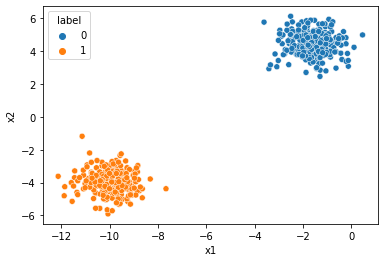

In [16]:
sns.scatterplot(data = classification_1, x='x1', y='x2', hue='label')
plt.show()


**Fitting line for Regression_1**

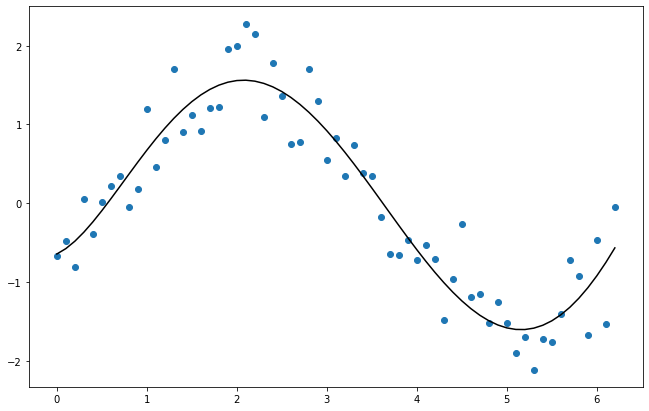

In [32]:
X = regression_1.iloc[:, 0].values
X = X.reshape(-1, 1)
y = regression_1.iloc[:, -1].values
y = y.reshape(-1, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree= 5, include_bias=False)
poly_fit = poly_features.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_fit, y)
y_predicted = poly_reg_model.predict(poly_fit)

plt.figure(figsize=(11,7))
plt.scatter(X, y)
plt.plot(X, y_predicted, c='black')
plt.show()

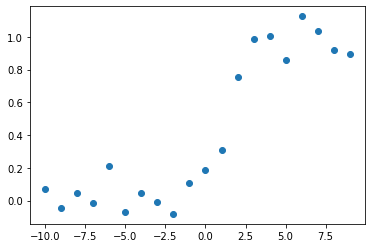

In [40]:
from sklearn.preprocessing import normalize
X = regression_2.iloc[:,0].values.reshape(1, -1)
y = regression_2.iloc[:,1].values.reshape(1, -1)
plt.scatter(X,y)
plt.plot()

**Fitting line for Regression_2**

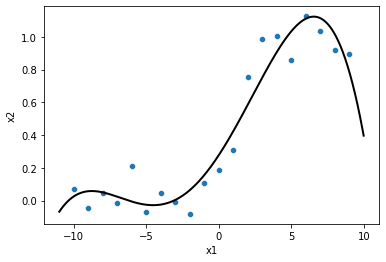

In [67]:
from scipy.optimize import curve_fit

# Define the quadratic function
def quadratic(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x +e
# data to fit
X = np.asarray(regression_2['x1'])
y = regression_2['x2']
values = curve_fit(quadratic,X,y)[0]
# Use curve_fit to fit the quadratic function to the data
x=np.arange(-11,10.0,0.01)
y_fit = quadratic(x,*values)
plt.plot(x,y_fit,color='black',linewidth= 2)
sns.scatterplot(data=regression_2,x='x1',y='x2')
plt.show()

**Fitting line for Classification**

In [52]:
classification_1.head(10)

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1
5,-0.326299,5.184230,0
6,-1.226970,4.277566,0
7,-10.095259,-4.463325,1
8,-1.442369,2.940516,0
9,-9.699568,-3.918992,1


In [53]:
classification_1.describe()

,x1,x2,label
count,500.000000,500.000000,500.000000
mean,-5.798389,0.245624,0.500000
std,4.231003,4.256805,0.500501
min,-12.135348,-5.907046,0.000000
25%,-9.910831,-3.966689,0.000000
50%,-5.643838,0.638195,0.500000
75%,-1.640695,4.432683,1.000000
max,0.462040,6.121048,1.000000


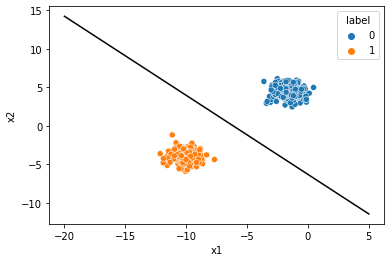

In [65]:
from matplotlib import colors
import numpy as np
from seaborn import scatterplot
from sklearn.svm import SVC

X = classification_1.iloc[:, :-1].values
y = classification_1.iloc[:, -1].values

clas_1 = SVC(kernel='linear')
clas_1.fit(X, y)

w = clas_1.coef_[0]
i = clas_1.intercept_[0]
x_visual = np.linspace(-20,5)
y_visual = -(w[0] / w[1]) * x_visual - i / w[1]

scatterplot(data = classification_1, x= 'x1', y='x2', hue= 'label')
plt.plot(x_visual, y_visual,color ='black')
plt.show()